## Thera Bank Personal Loan Campaign

### `Project: Problem Statement - Personal Loan Campaign Modelling`
#### Thera Bank Personal Loan Campaign
#### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



### `Objective:`
- The classification goal is to predict the likelihood of a liability customer buying personal loans.
 

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions using a classification model

- Model evaluation



### `Domain` 
- Banking

**Note that the project will need you to apply the concepts of groupby and merging extensively.**
Note that the project will need you to apply the concepts of groupby and merging extensively.

### `Context:`

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.




#### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer(000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month(000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any(000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?



### `Steps and tasks:`

1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
•	Number of unique in each column?
•	Number of people with zero mortgage?
•	Number of people with zero credit card spending per month?
•	Value counts of all categorical columns.
•	Univariate and Bivariate
•	Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6.	Give conclusion related to the Business understanding of your model? (5 marks)




**`Please provide you insights wherever necessary.`**

### 1]  Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import preprocessing

In [10]:
# importing data

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()      # used to see top 5 rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
df.dtypes        ## this would give datatype of each column

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


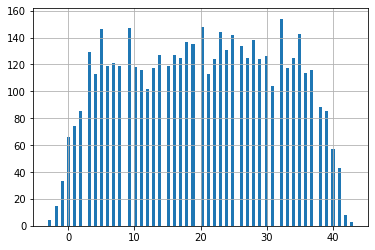

In [11]:
df['Experience'].hist(bins=100)

In [13]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [8]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

# df['Experience'] = df['Experience'].abs()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


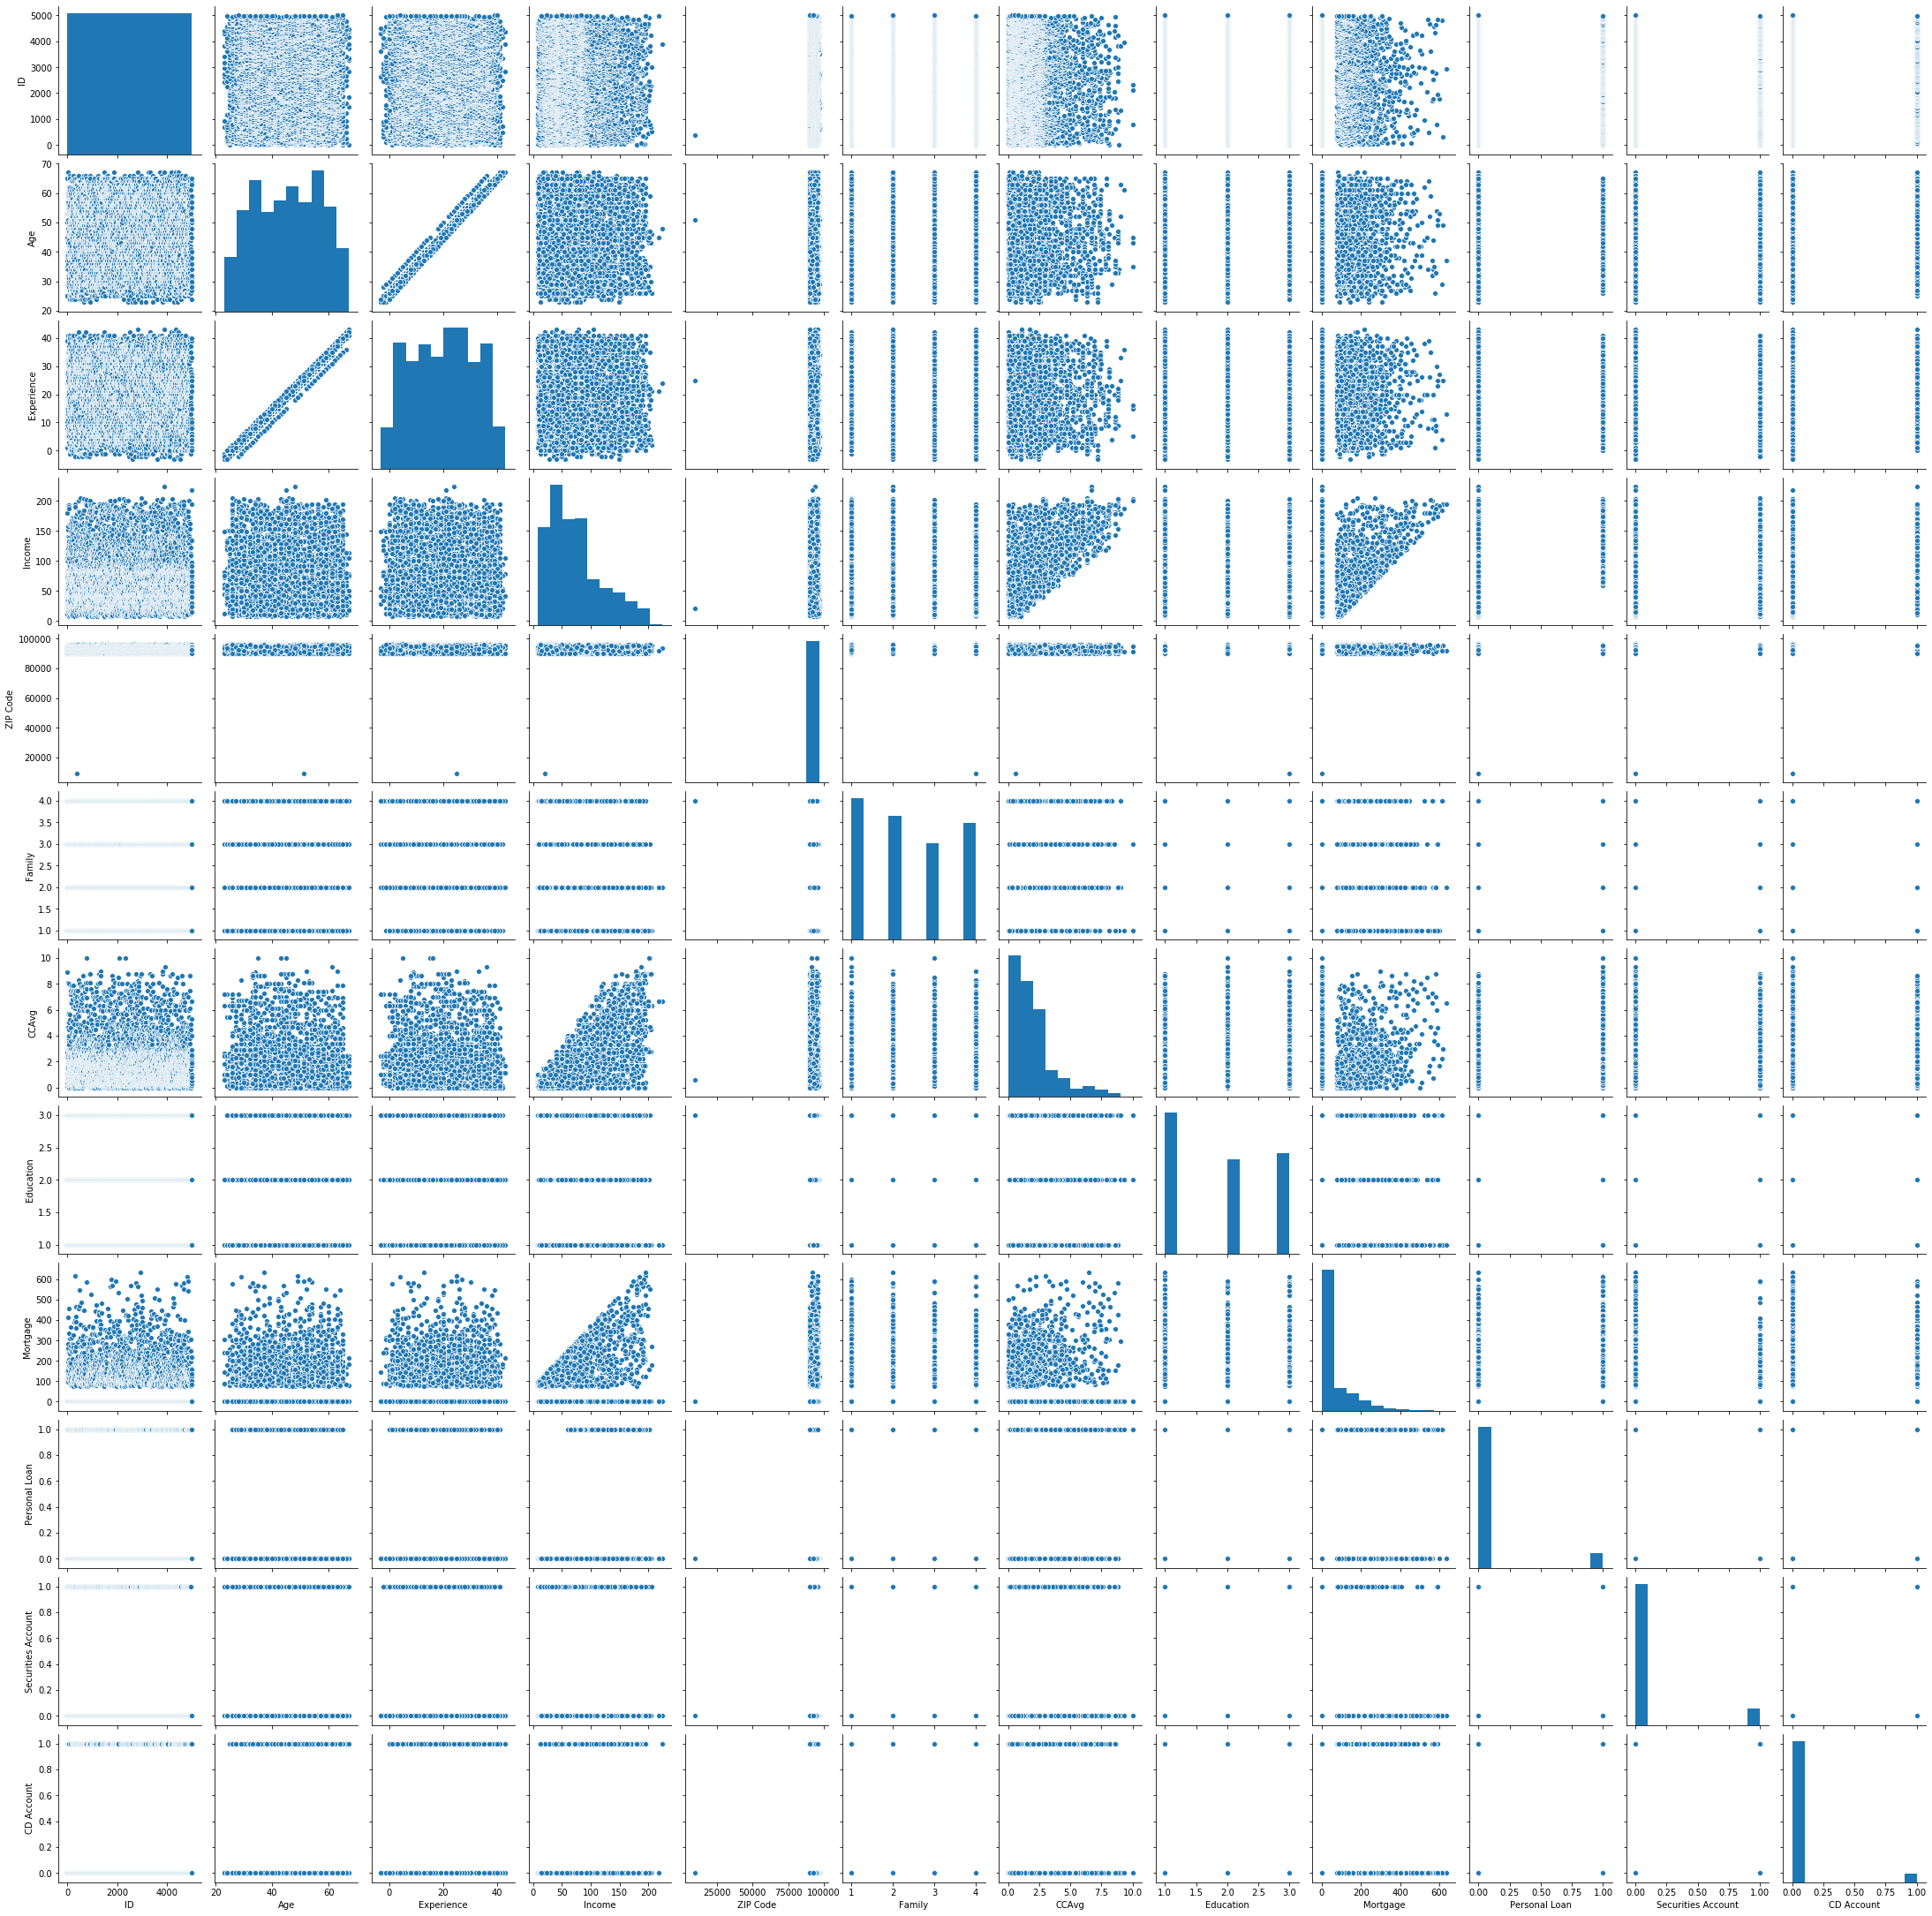

In [14]:
df_attr = df.iloc[:,0:12]

sns.pairplot(df_attr)

In [15]:
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [16]:
ages = list(df[df['Experience']<0]['Age'].unique())
indexes = df[df['Experience']<0].index.tolist()
print(ages)
print(indexes)

[25, 24, 28, 23, 29, 26]
[89, 226, 315, 451, 524, 536, 540, 576, 583, 597, 649, 670, 686, 793, 889, 909, 1173, 1428, 1522, 1905, 2102, 2430, 2466, 2545, 2618, 2717, 2848, 2876, 2962, 2980, 3076, 3130, 3157, 3279, 3284, 3292, 3394, 3425, 3626, 3796, 3824, 3887, 3946, 4015, 4088, 4116, 4285, 4411, 4481, 4514, 4582, 4957]


In [17]:
for idx in indexes:
    for age in ages:
        df.loc[idx,'Experience'] = df[(df.Age == age) & (df.Experience > 0)]['Experience'].mean()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.135743,11.413140,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


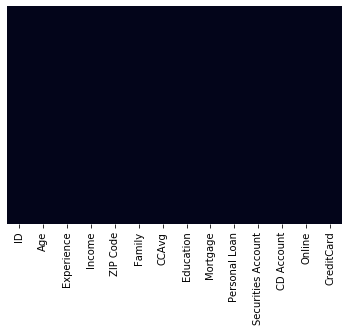

In [7]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

In [9]:
df.isnull().sum()  #check for null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## EDA

### 2]  EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

Number of unique in each column?

Number of people with zero mortgage?

Number of people with zero credit card spending per month?

Value counts of all categorical columns.

Univariate and Bivariate

Get data model ready

In [10]:
# Column descriptions

## Data Description:

##	ID	Customer ID

##	Age	Customer's age in completed years

##	Experience	#years of professional experience

##	Income	Annual income of the customer ($000)

##	ZIPCode	Home Address ZIP code.

##	Family	Family size of the customer

##	CCAvg	Avg. spending on credit cards per month ($000)

##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

##	Mortgage	Value of house mortgage if any. ($000)

##	Personal Loan	Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True

##	Securities Account	Does the customer have a securities account with the bank? 0 - False and 1 - True

##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True

##	Online	Does the customer use internet banking facilities? 0 - False and 1 - True

##	CreditCard	Does the customer use a credit card issued by UniversalBank? 0 - False and 1 - True

In [28]:
df.nunique()
# gives number of unique values in each column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [29]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

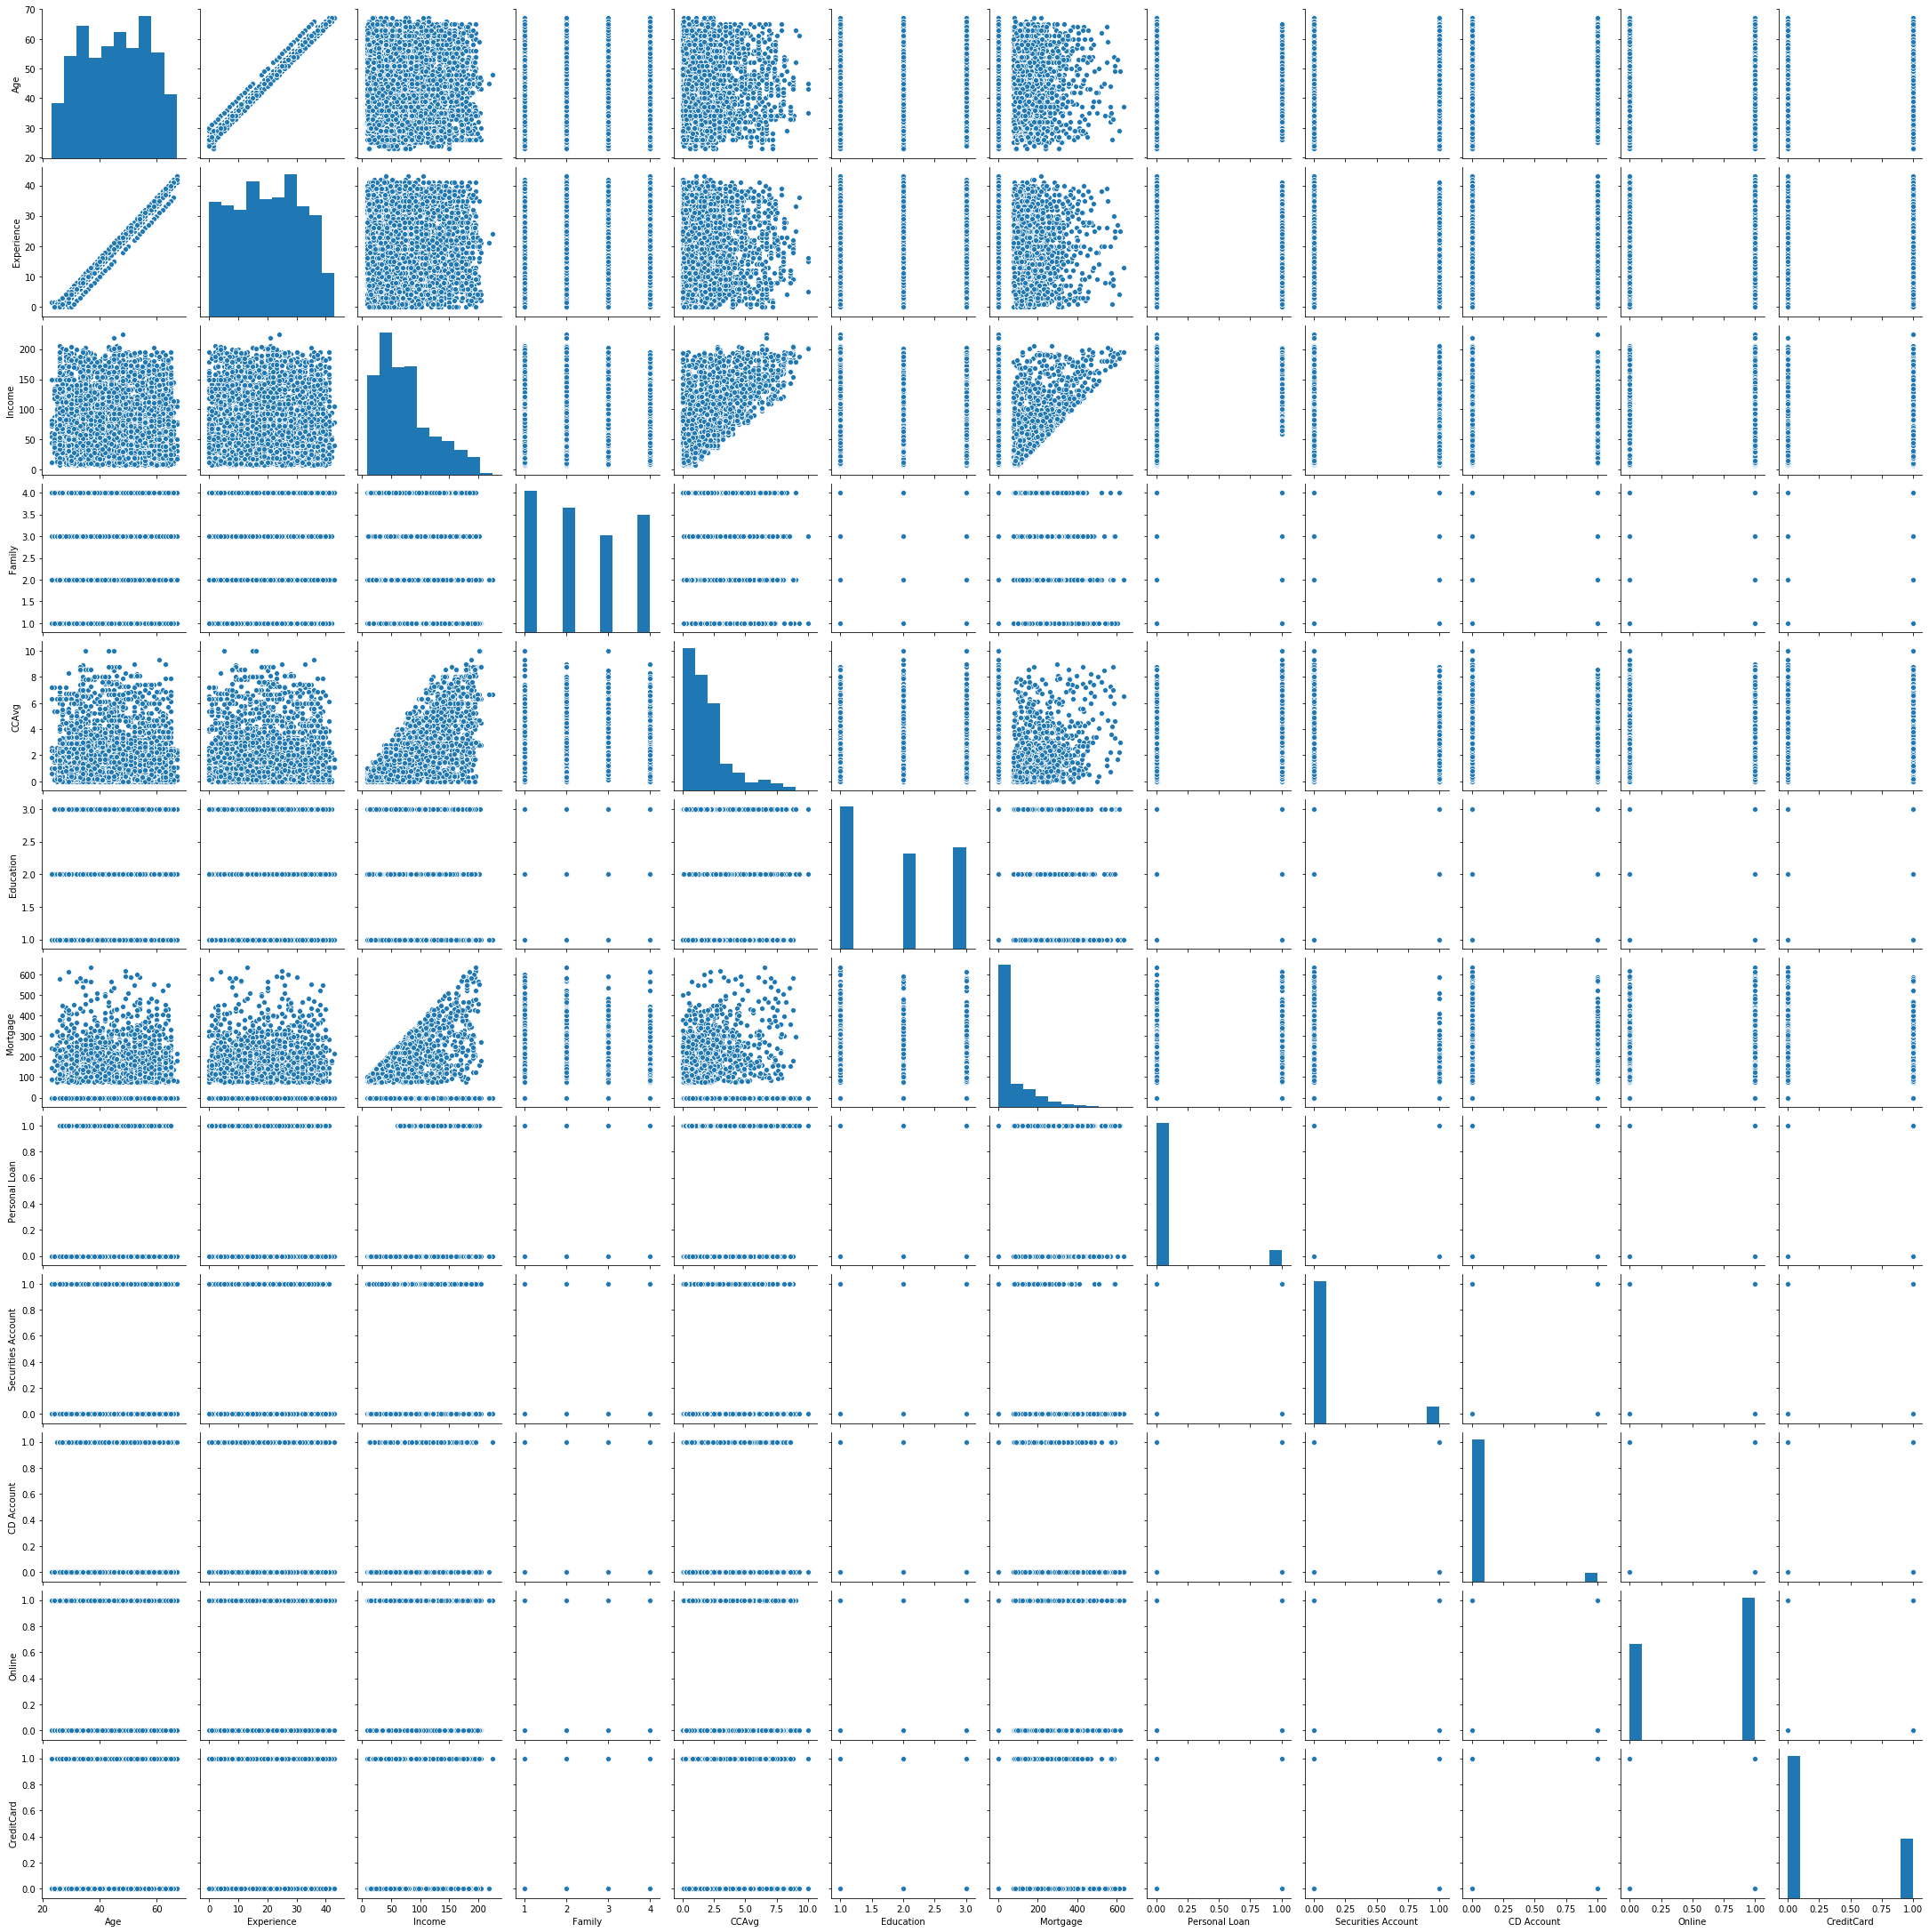

In [31]:
sns.pairplot(df)
plt.show()

In [14]:
# Age and experience have strong positive relation
# Age and Experience have uniform distribution
# Income is positively skewed

### Target Variable is Personal Loan

In [26]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


0    90.4
1     9.6
Name: Personal Loan, dtype: float64



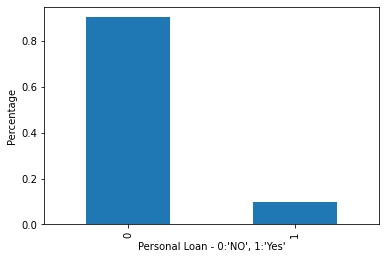

In [16]:
print(df['Personal Loan'].value_counts(normalize=True)*100)
print()
df['Personal Loan'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Personal Loan - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

In [17]:
df[df['Mortgage']==0].shape[0]

#count of people having home mortgage as zero, Most of the people donot have mortgage

3462

In [18]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='columns')

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


`When CreditCard value is 0 or 1 in both cases the distribution of target variable is same therefore dropping CreditCard`

In [19]:
df.drop('CreditCard',axis=1,inplace=True)

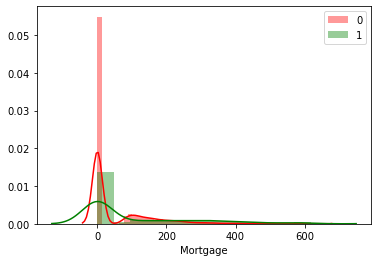

In [20]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

# Most people with zero mortgage are not taking personal loans

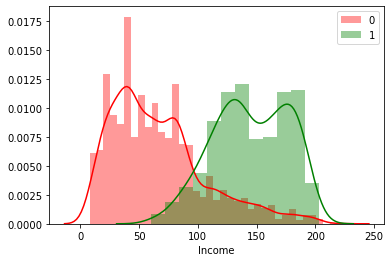

In [21]:
sns.distplot(df[df['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

# Number of People with high income taking personal loan are high as compared to low income

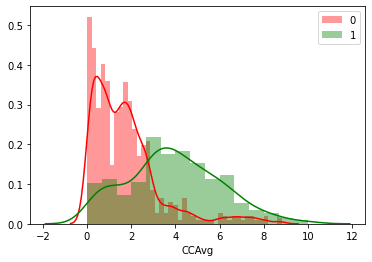

In [22]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show()

# People with high avg credit card spending per month are taking personal loans

In [23]:
df[df['CCAvg']==0].shape[0]

#count of people having zero monthly spending on credit card

106

In [24]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

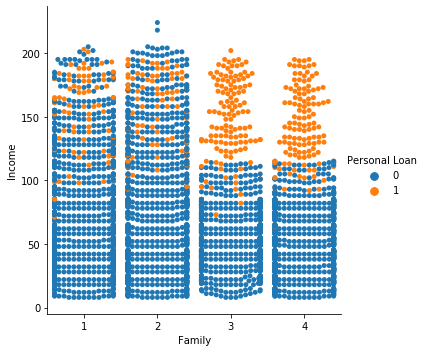

In [32]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data=df, kind='swarm')

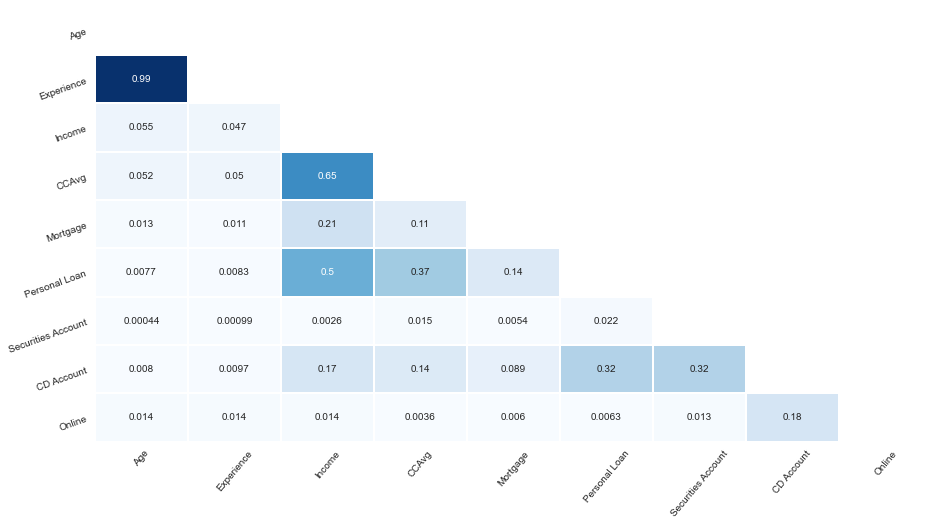

In [25]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`Age and Experience has 0.99 correlation therefore dropping Experience`

In [26]:
df.drop('Experience',axis=1,inplace=True)

In [27]:
## Additional
    
### New variable extracted from mortgage

df['Mortgage_category'] = df['Mortgage'].apply(lambda x:1 if x>=1 else 0)
# Here, lambda function gives output as 1 whenever 'Mortgage' value is greater than or equal to 1 else it gives 0
## These outputs are stored ina new column 'Mortgage_category'

df['Mortgage_category'] = df['Mortgage_category'].astype('category') # Converting column to 'category' datatype

df['Mortgage_category'].value_counts()

0    3462
1    1538
Name: Mortgage_category, dtype: int64

- 1. Income of most of the people in this dataset range from 10-100.It is right skewed. 
- 2. CCAvg for most of the people is between 0-3. It is right skewed.
- 3. ID is unique for customers so don't have a relationship with Personal Loan.We can simply drop it.
- 4. ZIP Code also don't seems to be related to Personal Loan. We can drop this too. 
- 5. Age doesn't seems to be related to Personal Loan.But we will keep and check its relevant after building model. 
- 6. People who have taken loan tends to have more income. 
- 7. People with more income tend to take Personal Loan. 
- 8. People who are purchasing more with credit card tends to take Loan(CCAvg). 
- 9. Personal Loan doesn't depend on ZIP Code,ID. 
- 10. Personal Loan doesn't seems to be related to Online,Creditcard,Securities Account. 
- 11. Out of all the most prominient factor on which Loan depends on seem CCAvg,CAccount,income,family,education,Experience.

### 3]  	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [28]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [29]:
x = pd.get_dummies(x,drop_first=True)

In [30]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [31]:
x.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
0,25,49,1.6,0,1,0,0,0,0,1,0,0,0
1,45,34,1.5,0,1,0,0,0,1,0,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,1,0,0
4,35,45,1.0,0,0,0,0,0,0,1,1,0,0


### 4]  Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [32]:
# Create the training and test data set in the ratio of 60:40 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.4, random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [33]:
xtrain.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
4601,37,55,2.5,0,0,0,1,0,0,0,0,1,0
1324,52,15,0.2,0,0,0,1,0,0,0,0,0,0
381,55,73,2.3,0,0,0,1,1,0,0,0,1,0
3744,54,79,1.6,0,0,0,0,0,1,0,0,1,0
613,60,108,0.9,0,1,0,0,0,0,0,0,0,0


In [34]:
xtest.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
3406,42,34,2.0,0,0,0,0,0,1,0,0,1,0
757,52,81,1.8,0,1,0,0,0,1,0,1,0,0
3624,58,70,1.4,0,0,0,0,0,0,0,0,1,0
4544,28,80,2.5,0,0,0,1,0,1,0,0,0,0
3235,60,39,1.6,0,0,0,1,1,0,0,0,1,0


#### Base Model

In [35]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

In [36]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9533333333333334

Testing accuracy 0.963


In [37]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [38]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## importing necessary metrics to evaluate model performance

In [39]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

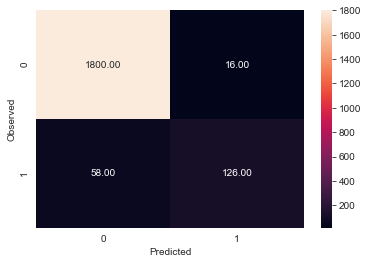

In [40]:
draw_cm(ytest,y_predict)

In [41]:
recall_score(ytest,y_predict)

0.6847826086956522

In [42]:
precision_score(ytest,y_predict)

0.8873239436619719

In [43]:
f1_score(ytest,y_predict)

0.7730061349693252

In [44]:
roc_auc_score(ytest,y_predict)

0.8379860180042139

In [45]:
# !pip install yellowbrick

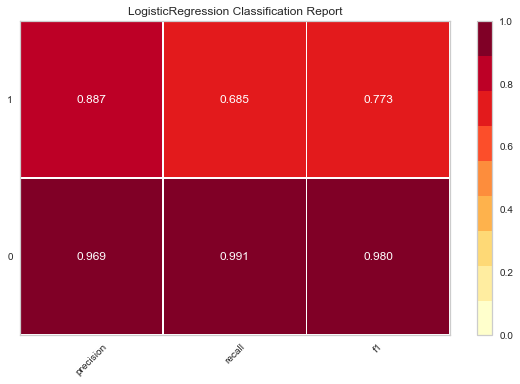

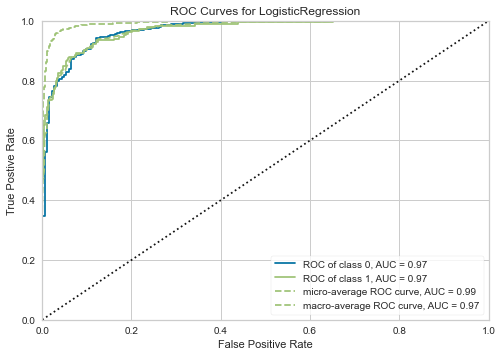

In [46]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

### 5] Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [47]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
10,Education_2,3.31
5,CD Account,3.19
11,Education_3,3.01
8,Family_3,1.32
9,Family_4,1.30
4,Securities Account,1.29
6,Online,0.56
7,Family_2,0.52
12,Mortgage_category_1,0.25
2,CCAvg,0.12


In [48]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Loan Status'] = ytest
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status']!=z['Predicted Loan Status']]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1,Observed Loan Status,Predicted Loan Status
4575,53,115,0.5,0,0,0,0,1,0,0,0,1,0,1,0
78,54,133,2.6,0,0,0,0,1,0,0,0,1,0,1,0
3383,46,135,4.1,213,0,0,1,0,1,0,0,0,1,1,0
459,35,200,3.0,458,0,0,0,1,0,0,0,0,1,0,1
2304,27,170,4.7,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,54,121,1.1,0,1,0,0,1,0,0,0,1,0,1,0
4604,32,81,3.4,0,0,0,0,1,0,0,1,0,0,1,0
57,56,131,1.2,0,0,0,0,1,0,0,0,1,0,1,0
1589,57,124,0.2,0,0,0,1,0,0,0,1,0,0,1,0


`81 rows where predicted target variable is not equal to actual target variable`

### 6] Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted Personal loan will be taken and the customer took it

*False Positive (observed=0,predicted=1):*

Predicted Personal loan will be taken and the customer did not take it

*True Negative (observed=0,predicted=0):*

Predicted Personal loan will not be taken and the customer did not take it

*False Negative (observed=1,predicted=0):*

Predicted Personal loan will not be taken and the customer took it

##### `Important Features`

"Education_2", "CD Account", "Education_3", "Family_3", "Family_4" 
seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Age" and "Mortgage" doesn't play any role in predicting the target variable.

##### `Important Metric`

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. **less number of False Negative**, so that bank doesn't lose real customers who want to take loan. Hence the **focus should be on increasing Recall**.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.